In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102203.png
/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102309.png
/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102450.png
/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102410.png


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def show_image(img, title ='',cmap ='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [6]:
fig1_path ='/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102203.png'
fig2_path ='/kaggle/input/lab-02/lab_02_cse438/Screenshot 2025-07-07 102309.png'


In [7]:
fig1 = cv2.imread(fig1_path,cv2.IMREAD_GRAYSCALE)
fig2 = cv2.imread(fig2_path,cv2.IMREAD_GRAYSCALE)

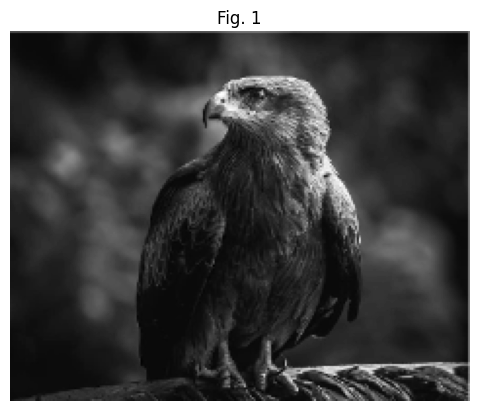

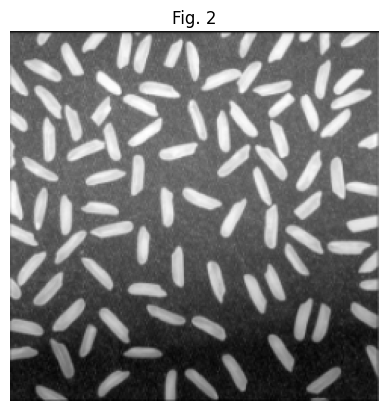

In [8]:
show_image(fig1,"Fig. 1")
show_image(fig2,"Fig. 2")

In [11]:
def show_image_and_hist(img, title='Image'):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.tilte(title)
    plt.axis('off')
    plt.sobplot(1, 2, 2)
    plt.hist(img.ravel(), 256, [0, 256], color='blue' , alpha=0.7)
    plt.tilte(f'{title} HISTOGRAM')
    plt.xlabel('Pixel Value')
    plt.Ylabel('Frequency')    
    plt.tight_layout()
    plt.show()

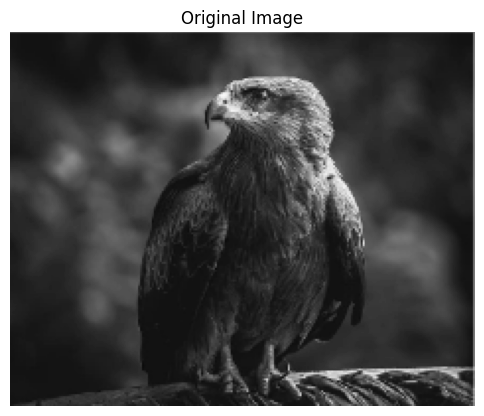

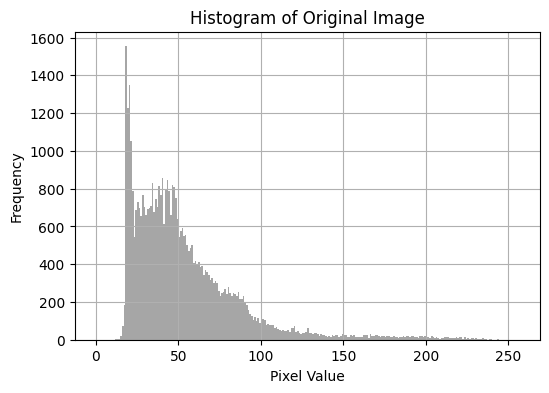

In [17]:
# Show the original image only
plt.figure(figsize=(6, 6))
plt.imshow(fig1, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Show the histogram of the original image
plt.figure(figsize=(6, 4))
plt.hist(fig1.ravel(), 256, [0, 256], color='gray', alpha=0.7)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


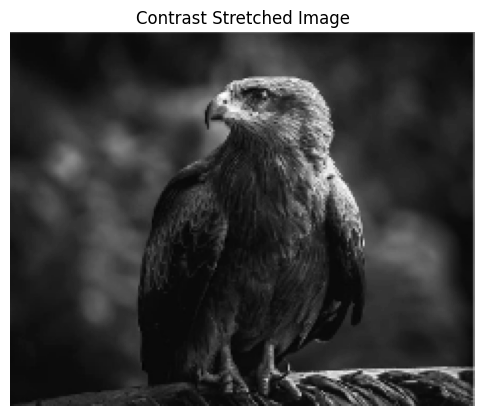

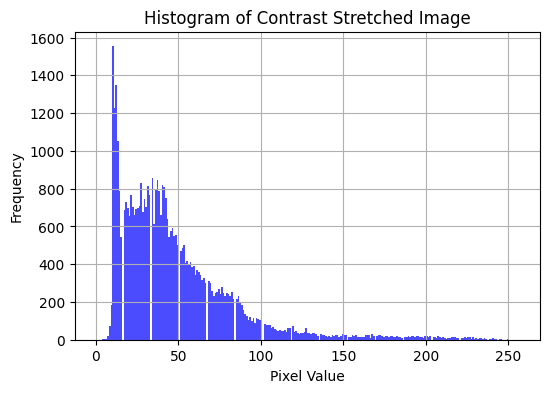

In [16]:
# Contrast stretching
min_val = np.min(fig1)
max_val = np.max(fig1)
contrast_stretched = ((fig1 - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Show the image only
plt.figure(figsize=(6, 6))
plt.imshow(contrast_stretched, cmap='gray', vmin=0, vmax=255)
plt.title("Contrast Stretched Image")
plt.axis('off')
plt.show()

# Show the histogram only
plt.figure(figsize=(6, 4))
plt.hist(contrast_stretched.ravel(), 256, [0, 256], color='blue', alpha=0.7)
plt.title("Histogram of Contrast Stretched Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


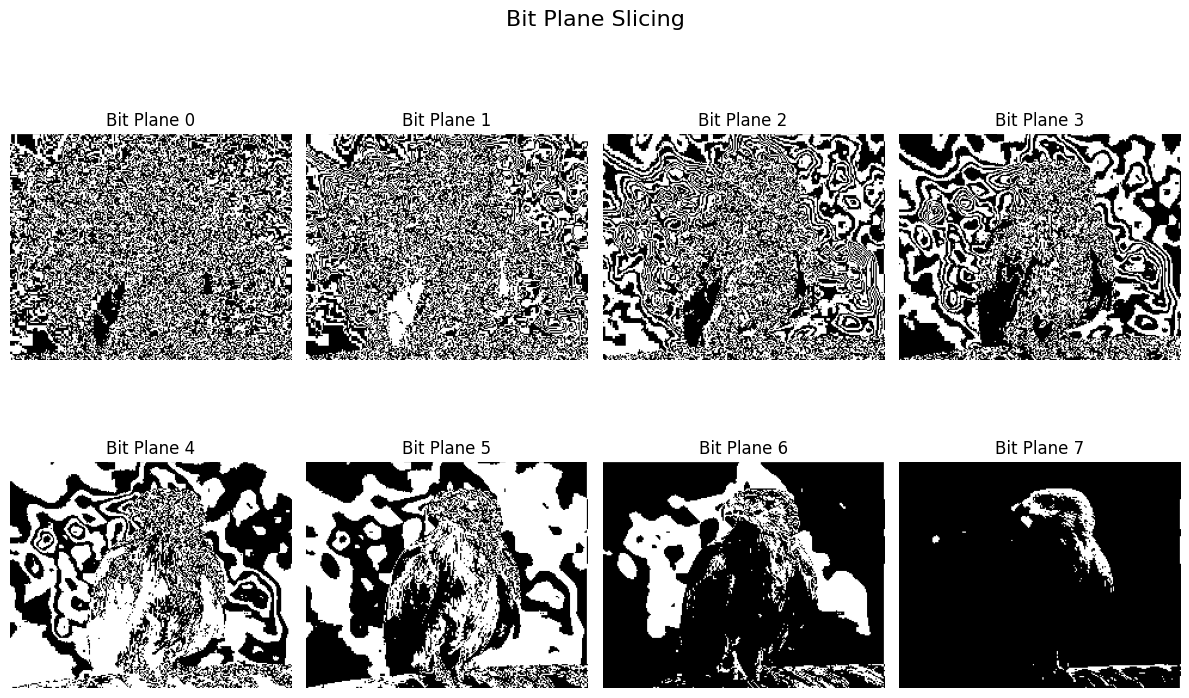

In [19]:
# Ensure image is 8-bit grayscale
image = fig1.astype(np.uint8)

# Plot all 8 bit planes
plt.figure(figsize=(12, 8))
for i in range(8):
    # Create bitmask for the i-th bit
    bit_plane = (image >> i) & 1
    bit_plane_img = (bit_plane * 255).astype(np.uint8)

    # Show bit plane
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_plane_img, cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.suptitle('Bit Plane Slicing', fontsize=16)
plt.tight_layout()
plt.show()

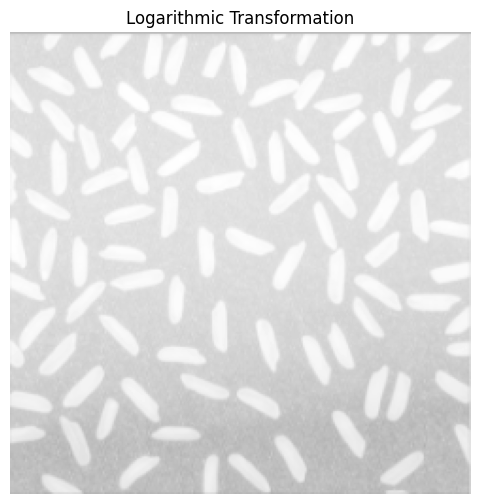

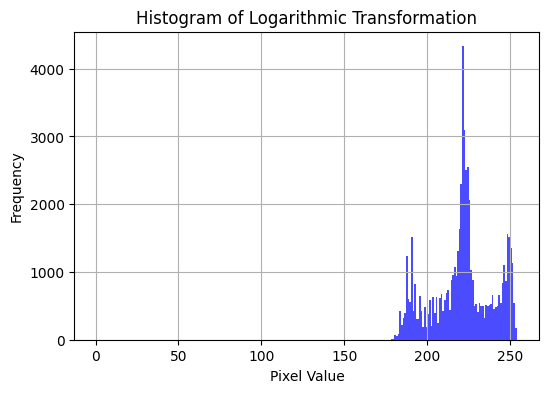

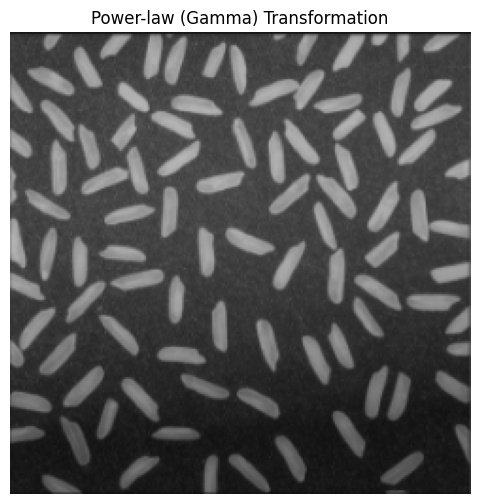

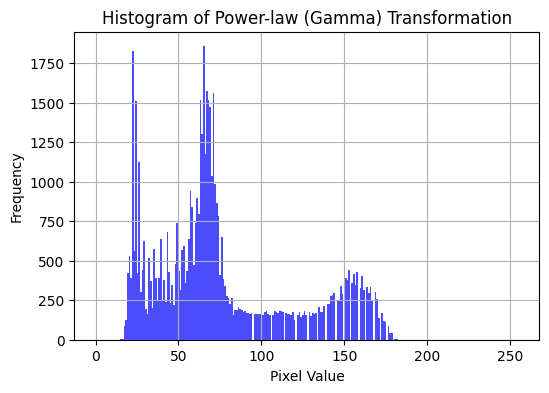

In [22]:
image = fig2.astype(np.float32)

# Logarithmic Transformation
c_log = 255 / np.log(1 + np.max(image))
log_transformed = c_log * np.log(1 + image)
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Power-law (Gamma) Transformation
gamma = 1.5  # you can adjust this value
normalized_img = image / 255.0
power_law_transformed = 255 * (normalized_img ** gamma)
power_law_transformed = np.array(power_law_transformed, dtype=np.uint8)

def show_image_and_hist_separate(img, title):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(6,4))
    plt.hist(img.ravel(), bins=256, range=[0,255], color='blue', alpha=0.7)
    plt.title(f"Histogram of {title}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

show_image_and_hist_separate(log_transformed, "Logarithmic Transformation")
show_image_and_hist_separate(power_law_transformed, "Power-law (Gamma) Transformation")